# 5012 HW #2. Improve code Efficiency: Sort First!
### Alanna Hazlett
### uwa6xv
### September 13th, 2024
## Scenario. 

In a two class, classification problem, it is common to use a classifier that outputs confidences (rather than simply class labels). A good example of this is a Support Vector Machine. A pro for using such a classifier is that you gain more information -- specifically the confidence in the classification result. A con is that in order to make a final classification decision, a threshold value must be determined. For example, if a threshold of 0.75 is chosen, the class label 1 would be assigned for confidences greater than 0.75 and for confidences less than 0.75 a class label of 0 would be assigned. However, this begs the question: how is the threshold chosen?

Many data scientists will choose a threshold based on the experimental results and/or operational constraints. In this code example, we assume that we have confidences and true labels for a large data set. To determine a good threshold we will compute the true positive rates (TPRs) and false positive rates (FPRs) at all relevant thresholds. The relevant thresholds are considered those that would change the TPRs and FPRs. 

In the code below, a function is defined to compute the TPR and FPR at all relevant thresholds. However, the code is not very efficient and can be improved. (Note there are tips and hints found in the comments.) 

Your task is the following:

## Question 1
**40 POINTS**  
Assess the time complexity of the method computeAllTPRs(...). Provide a line-by-line assessment in comments identifying the proportional number of steps (bounding notation is sufficient) per line: eg, O(1), O(log n), O(n), etc. Also, derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 2
**30 POINTS**  
Implement a new function computeAllTPRs_improved(...) which performs the same task as computeAllTPRs but has a significantly reduced time complexity. Also provide a line-by-line assessment in comments identifying the proportional number of steps per line, and derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 3
**30 POINTS**  
Compare the theoretical time complexities of both methods and predict which is more efficient. Next, test your prediction by timing both methods on sample inputs of varying sizes. Create a plot of inputSize vs runtime (as done in similar class examples).  

**NOTE: Do not include runtimes for graphing**

**TOTAL POINTS: 100**

---

In [1]:
import matplotlib.pyplot as plt
import random
from copy import deepcopy
from numpy import argmax
import time

Answer Question #1 in the comments of the code chunk below. 

In [2]:
    def computeAllTPRs(true_label, confs, show_graph = True):
        '''

        inputs:
         - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
         - confs: list of confidences

        This method computes the True Positive Rate (TPRs) and FPRs for all relevant
        thresholds given true_label and confs. Relevant thresholds are considered
        all different values found in confs.
        '''

        # Define / initialize  variables
        sentinelValue = -1 # used to replace max value found thus far                    #O(1)
        totalPositives = sum(true_label)                                                 #O(n)
        totalNegatives = len(true_label) - totalPositives                                #O(n)
        #print(true_label)                                                               #O(1) 
        truePositives = 0                                                                #O(1)
        falsePositives = 0                                                               #O(1)
        # Hint: Consider Memory Management
        truePositiveRate = []                                                            #O(1)
        falsePositiveRate = []                                                           #O(1)

        #Hint: Although not explicitly clear, the loop structure below is an 
            #embeded loop ie, O(n^2) ... do you see why??
        #Hint: If you sort the confidences first you can improve the iteration scheme.
        
        # Iterate over all relevant thresholds. Compute TPR and FPR for each and 
        # append to truePositiveRate , falsePositiveRate lists. 
        for i in range(len(confs)):                                                      #O(n)
          maxVal = max(confs)  # Hint: the max method does NOT run in O(1)               #O(n)  
          argMax = argmax(confs)#Returns the indices of the maximum values along an axis #O(n)                                                      
          confs[argMax] = sentinelValue                                                  #O(1)
          #print(argMax)                                                                 #O(1) 
          if true_label[argMax]==1:                                                      #O(1)
            truePositives += 1                                                           #O(1)
          else:                                                                          #O(1)
            falsePositives += 1                                                          #O(1) 

          truePositiveRate.append(truePositives/totalPositives)                          #O(1) 
          falsePositiveRate.append(falsePositives/totalNegatives)                        #O(1)
          #print(truePositiveRate)                                                       #O(1) 

        if show_graph == True:
        # Plot FPR vs TPR for all possible thresholds 
            plt.plot(falsePositiveRate,truePositiveRate, label ='class ' + str(i) + ' to all')  
            plt.legend()                                                                     
            plt.xlabel('False Positive Rate')                                                
            plt.ylabel('True Positive Rate')                                                 
            plt.show()                                                                        
        
# n = length of true label        
# T(n) = O(1) + O(n) + O(n) + O(1) + O(1) + O(1) + O(1) + O(1) + O(n) * [O(n) + O(n) + O(1) + O(1) * O(1) + O(1) * O(1) + O(1) + O(1)]         
#      = O(n) * O(n) 
#      = O(n^2)

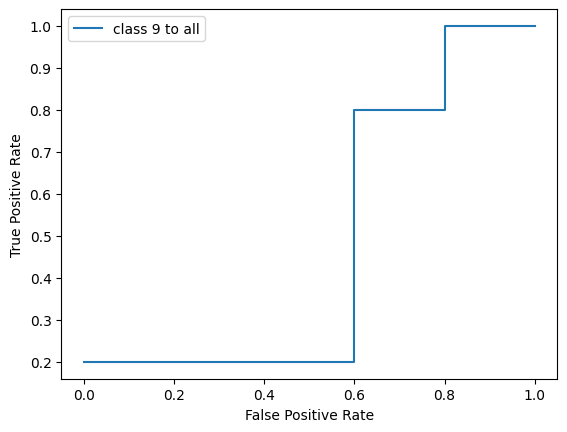

In [3]:
computeAllTPRs([0,1,0,1,1,1,0,0,0,1],[0,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90], show_graph = True)

In [4]:
def testComputeAllTPRs(numSamples):

  confList = []
  labels = []
  maxVal = 10000
  #numSamples = 10000
  for i in range(0,numSamples):
    n = random.randint(1,maxVal)
    confList.append(n/maxVal)
    if n/maxVal > .5: 
      lab = 1 
    else: 
      lab = 0
    labels.append(lab)
  #print(labels)
  #print(confList)
  computeAllTPRs(labels, deepcopy(confList))  # Why a deepcopy here?

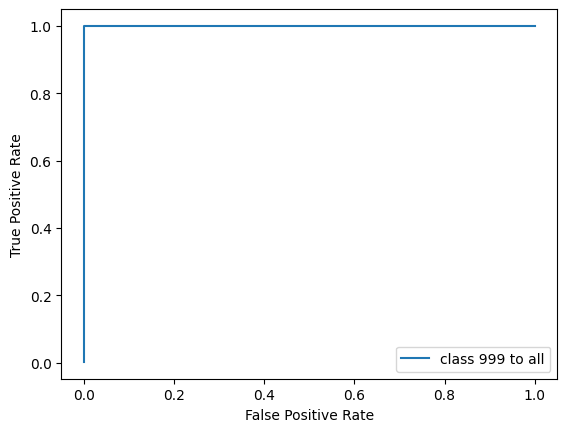

In [25]:
testComputeAllTPRs(1000)

**Below, provide your implementation for Question #2.**

In [9]:
    def computeAllTPRs_improved(true_label, confs, show_graph = True):
        '''

        inputs:
         - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
         - confs: list of confidences that is in ascending order

        This method computes the True Positive Rate (TPRs) and FPRs for all relevant
        thresholds given true_label and confs. Relevant thresholds are considered
        all different values found in confs.
        '''
       
        # Define / initialize  variables
        #sentinelValue = -1 # used to replace max value found thus far                   #O(1)
        totalPositives = sum(true_label)                                                 #O(n)
        totalNegatives = len(true_label) - totalPositives                                #O(n) 
        truePositives = 0                                                                #O(1)
        falsePositives = 0                                                               #O(1)
        truePositiveRate = []                                                            #O(1)
        falsePositiveRate = []                                                           #O(1)
        combo = list(zip(true_label, confs))                                             #O(1)
        sorted_combo = sorted(combo, reverse = True, key=lambda x: x[1])                 #O(n log n)
        
        for i in range(len(sorted_combo)):                                               #O(n)
          if sorted_combo[i][0]==1:                                                      #O(1)
            truePositives += 1                                                           #O(1)
          else:                                                                          #O(1)
            falsePositives += 1                                                          #O(1) 

          truePositiveRate.append(truePositives/totalPositives)                          #O(1) 
          falsePositiveRate.append(falsePositives/totalNegatives)                        #O(1)
          #print(truePositiveRate)                                                       #O(1) 
        if show_graph == True: 
            # Plot FPR vs TPR for all possible thresholds 
            plt.plot(falsePositiveRate,truePositiveRate, label ='class ' + str(i) + ' to all')  
            plt.legend()                                                                     
            plt.xlabel('False Positive Rate')                                                
            plt.ylabel('True Positive Rate')                                                 
            plt.show()                                                                        

# n = length of true label        
# T(n) = O(1) + O(n) + O(n) + O(1) + O(1) + O(1) + O(1) + O(1) + O(n log n) + O(n) * [O(1) + O(1) * O(1) + O(1) * O(1)]
#      = O(n log n) + O(n) * O(1) 
#      = O(n log n)

In [10]:
def testComputeAllTPRs_improved(numSamples):

  confList = []
  labels = []
  maxVal = 10000
  #numSamples = 10000
  for i in range(0,numSamples):
    n = random.randint(1,maxVal)
    confList.append(n/maxVal)
    if n/maxVal > .5: 
      lab = 1 
    else: 
      lab = 0
    labels.append(lab)
  #print(labels)
  #print(confList)
  computeAllTPRs_improved(labels, deepcopy(confList))  # Why a deepcopy here?

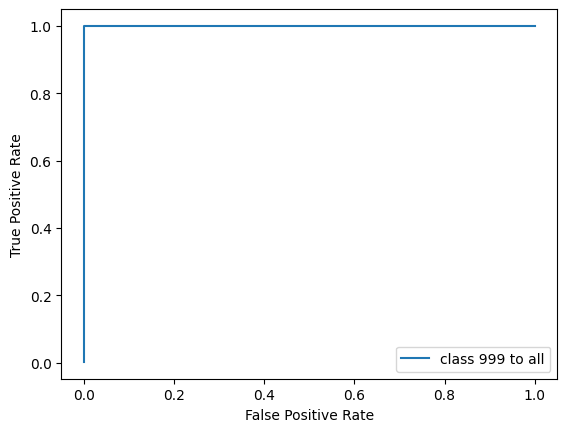

In [11]:
testComputeAllTPRs_improved(1000)

**Question #3. Below, provide your code which records and plots the runtime for the original and improved methods.**

Compare the theoretical time complexities of both methods and predict which is more efficient. Next, test your prediction by timing both methods on sample inputs of varying sizes. Create a plot of inputSize vs runtime (as done in similar class examples).

#### Theoretical Complexities
Based on the time analysis I completed on the functions computeAllTPRs is less efficient than computeAllTPRs_improved. computeAllTPRs has a time complexity of O(n^2), which is a quadratic relationship and computeAllTPRs_improved has time complexity of O(n log n). 

#### Reality Complexities
We see from the graphs below that indeed that computeAllTPRs has a time complexity of O(n^2) and that computeAllTPRs_improved is drastically improved. Due to scaling it looks like a flat line, but we know that it has a time complexity of O(n log n). The graphs confirm our beliefs of the improvement. 

Text(0, 0.5, 'Run Time')

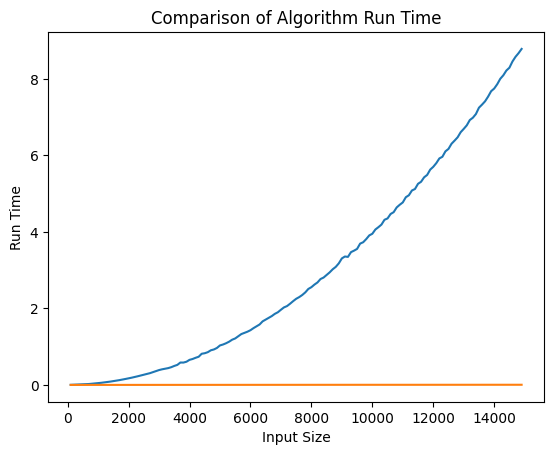

In [24]:
#import time

size = 15000
stepSize = 100
originalSort = []
improvedSort = []

for A in range(100, size, stepSize):
    # Create true label and confs lists
    options = [0,1]
    true_label = random.choices(options, k=A)
    #print(true_label)
    confs = [random.uniform(0,1) for item in range(A)]
    #print(confs)
    confs_copy = confs.copy() # This will be sorted copy for the improved algorithm
    
    #computeAllTPRs
    start = time.perf_counter()
    computeAllTPRs(true_label, confs, show_graph = False)
    end = time.perf_counter()
    originalSort.append(end - start)
    
    #computeAllTPRs_improved
    start = time.perf_counter()
    computeAllTPRs_improved(true_label, confs_copy, show_graph = False)
    end = time.perf_counter()
    improvedSort.append(end - start) 
    
plt.plot(range(100, size, stepSize), originalSort)
plt.plot(range(100, size, stepSize), improvedSort)
plt.title('Comparison of Algorithm Run Time')
plt.xlabel('Input Size')
plt.ylabel('Run Time')

Text(0, 0.5, 'Run Time')

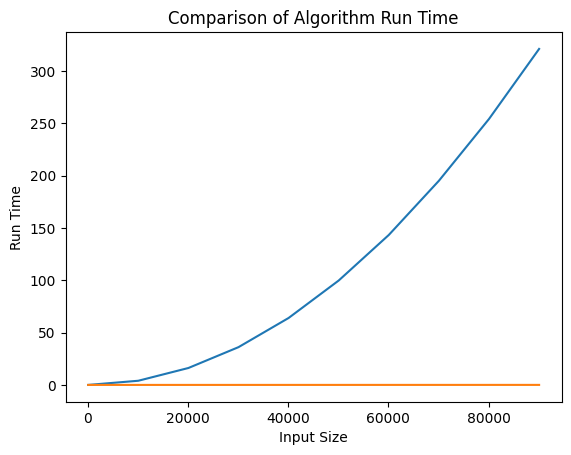

In [28]:
#Tried to run longer lists

size = 100000
stepSize = 10000
originalSort = []
improvedSort = []

for A in range(100, size, stepSize):
    # Create true label and confs lists
    options = [0,1]
    true_label = random.choices(options, k=A)
    #print(true_label)
    confs = [random.uniform(0,1) for item in range(A)]
    #print(confs)
    confs_copy = confs.copy() # This will be sorted copy for the improved algorithm
    
    #computeAllTPRs
    start = time.perf_counter()
    computeAllTPRs(true_label, confs, show_graph = False)
    end = time.perf_counter()
    originalSort.append(end - start)
    
    #computeAllTPRs_improved
    start = time.perf_counter()
    computeAllTPRs_improved(true_label, confs_copy, show_graph = False)
    end = time.perf_counter()
    improvedSort.append(end - start) 
    
plt.plot(range(100, size, stepSize), originalSort)
plt.plot(range(100, size, stepSize), improvedSort)
plt.title('Comparison of Algorithm Run Time')
plt.xlabel('Input Size')
plt.ylabel('Run Time')

<div class="alert alert-block alert-info">
<b>I pledge that I have neither given nor received help on this assignment. : Alanna Hazlett </b>
</div>